# KNN Classification

In [296]:
# Importing the required modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib as mp

## Reading Data

In [297]:
# Reading the data
data = pd.read_csv("iris.csv", sep=",")

data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [298]:
le = LabelEncoder()
data["target"] = le.fit_transform(data["iris"])

In [299]:
data

,sepal length,sepal width,petal length,petal width,iris,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## Splitting Data

In [300]:
X = data.drop(columns=["iris", "target"], axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Model

In [301]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k, p=4)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [302]:
len(y_test)
# knn_pred

30

## Metrics

In [303]:
acc = accuracy_score(y_true=y_test, y_pred=knn_pred)

print(f"The accuracy of this model is: {acc*100} percent")

The accuracy of this model is: 100.0 percent


## Visualisation

In [304]:
X2 = data[["sepal length", "sepal width"]]

knn.fit(X2, y)

x_min, x_max = X2["sepal length"].min() - 1, X2["sepal length"].max() + 1
y_min, y_max = X2["sepal width"].min() - 1, X2["sepal width"].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

d:\Anaconda\Installation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [305]:
def graphknn(knn, name):
    X2 = data[["sepal length", "sepal width"]]

    knn.fit(X2, y)

    x_min, x_max = X2["sepal length"].min() - 1, X2["sepal length"].max() + 1
    y_min, y_max = X2["sepal width"].min() - 1, X2["sepal width"].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = mp.colors.ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']


    mp.pyplot.figure()
    mp.pyplot.subplots(figsize = (15, 10))

    mp.pyplot.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x = X2["sepal length"], y = X2["sepal width"], hue=y_test, palette=cmap_bold, alpha=1.0, edgecolor="black")

    mp.pyplot.title(f"3-Class classification (k = {k}) using {name}")
    mp.pyplot.show()

### Different KNN distances

d:\Anaconda\Installation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Figure size 432x288 with 0 Axes>

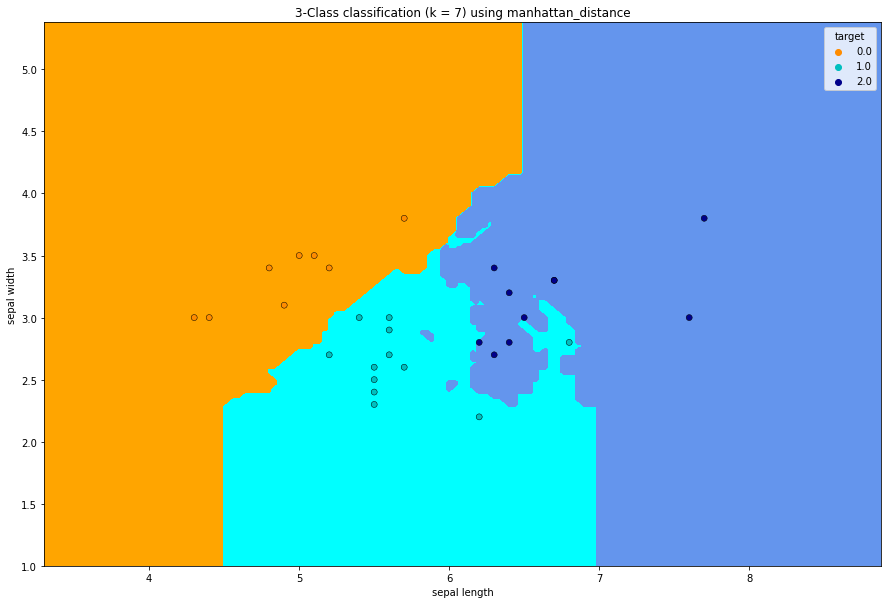

d:\Anaconda\Installation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Figure size 432x288 with 0 Axes>

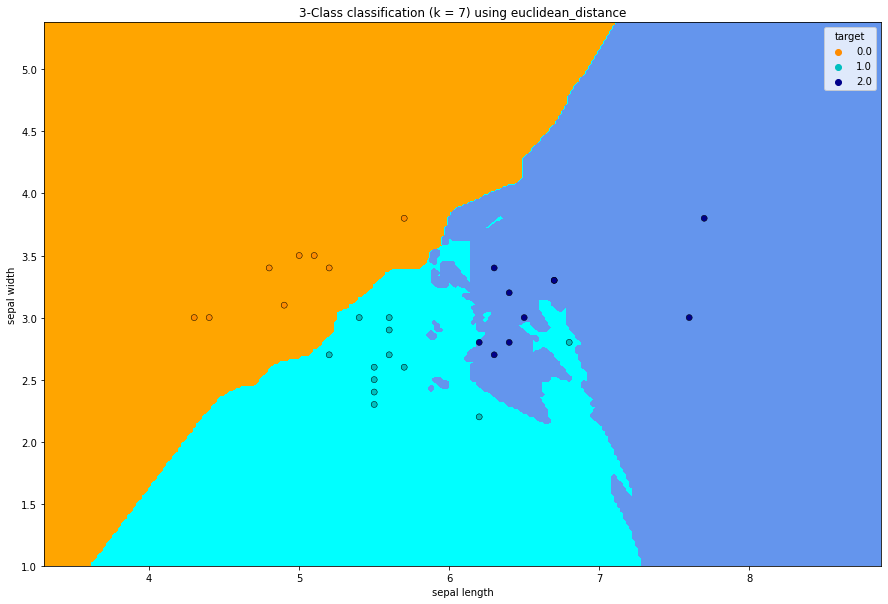

d:\Anaconda\Installation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Figure size 432x288 with 0 Axes>

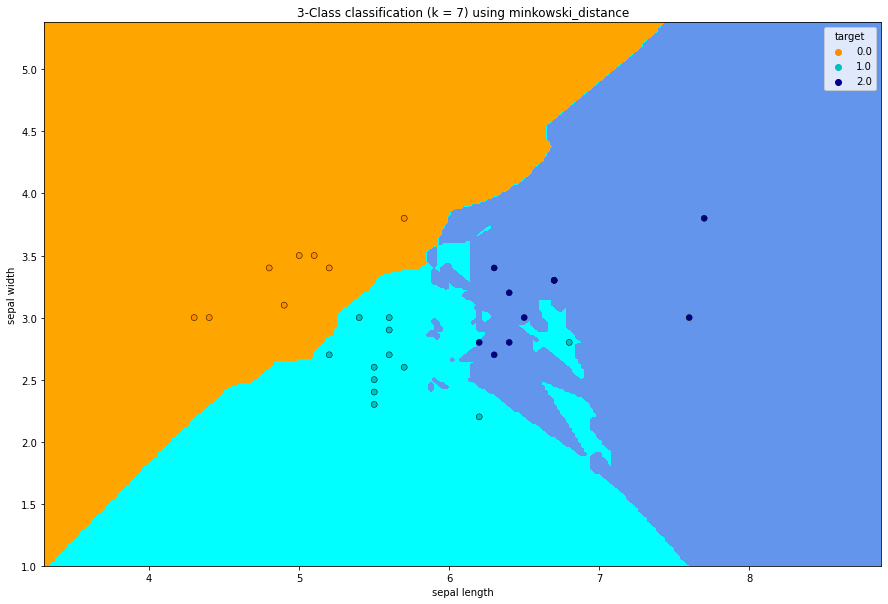

In [306]:
graphknn(KNeighborsClassifier(n_neighbors=k, p=1), "manhattan_distance")
graphknn(KNeighborsClassifier(n_neighbors=k, p=2), "euclidean_distance")
graphknn(KNeighborsClassifier(n_neighbors=k, p=3), "minkowski_distance")